<a href="https://colab.research.google.com/github/Francesfahey/Applied-Predictive-analytics-/blob/ASSIGNMENT/location_1_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import google drive and data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/Year 4/Applied Predictive Analytics/Wind prediction CA")
!pwd

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Year 4/Applied Predictive Analytics/Wind prediction CA


In [ ]:
import csv

datarows_loc1 = []
with open('Updated_loc1.csv', newline='') as csvfile:
    data_loc1 = csv.reader(csvfile, delimiter=',')
    # Load all content into rows
    rows = [row for row in data_loc1]



import pandas as pd

df_loc1= pd.read_csv("Updated_loc1.csv")

print(df_loc1)


       Location_ID        Date                 Time  Day  Month  Year  Hour  \
0                1  2017-01-02  2017-01-02 00:00:00    2      1  2017     0   
1                1  2017-01-02  2017-01-02 01:00:00    2      1  2017     1   
2                1  2017-01-02  2017-01-02 02:00:00    2      1  2017     2   
3                1  2017-01-02  2017-01-02 03:00:00    2      1  2017     3   
4                1  2017-01-02  2017-01-02 04:00:00    2      1  2017     4   
...            ...         ...                  ...  ...    ...   ...   ...   
43795            1  2021-12-31  2021-12-31 19:00:00   31     12  2021    19   
43796            1  2021-12-31  2021-12-31 20:00:00   31     12  2021    20   
43797            1  2021-12-31  2021-12-31 21:00:00   31     12  2021    21   
43798            1  2021-12-31  2021-12-31 22:00:00   31     12  2021    22   
43799            1  2021-12-31  2021-12-31 23:00:00   31     12  2021    23   

        Power  temperature_2m  relativehumidity_2m 

##Linear Regression

Mean Squared Error (MSE): 0.03113747327707906
Mean Absolute Error (MAE): 0.13926282533880843
R-squared (R²): 0.6237276144361137


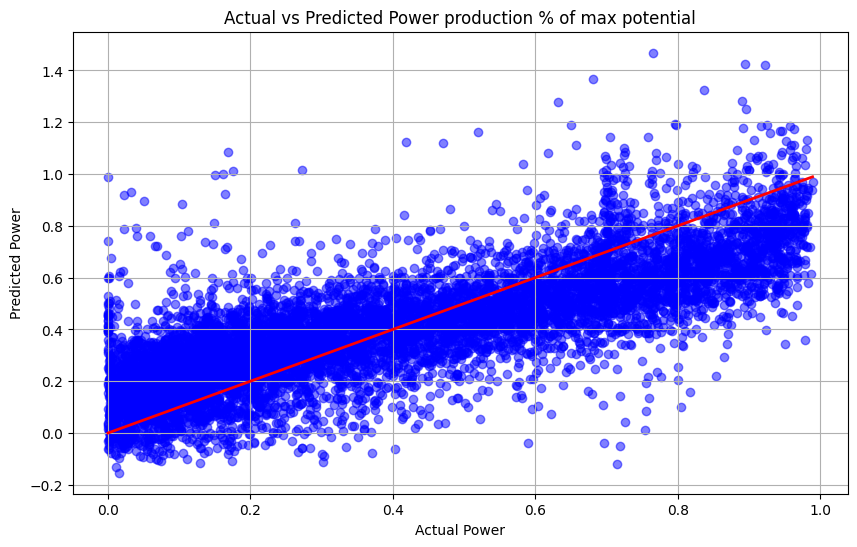

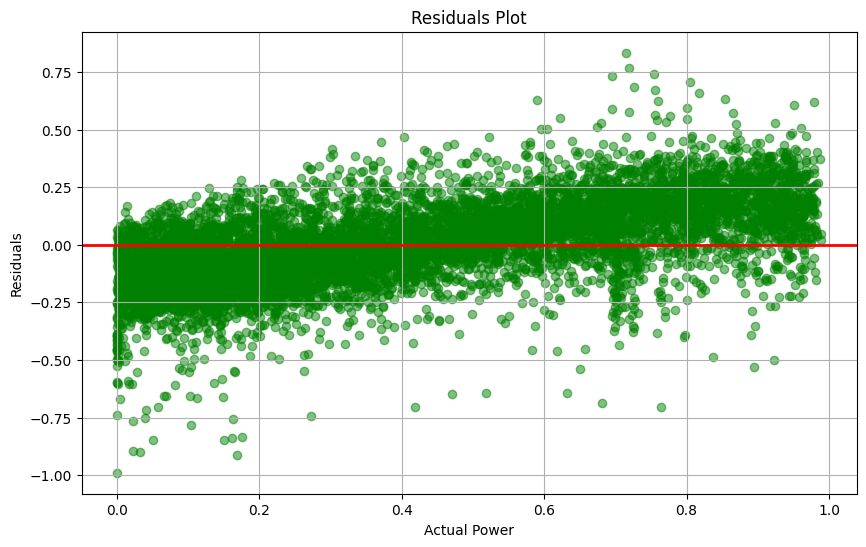

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Select features and target
X = df_loc1.drop(['Power', 'Date', 'Time'], axis=1)
y = df_loc1['Power']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

# Visualize the results: Actual vs Predicted power consumption
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title("Actual vs Predicted Power production % of max potential")
plt.xlabel("Actual Power")
plt.ylabel("Predicted Power")
plt.grid(True)
plt.show()

# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linewidth=2)
plt.title("Residuals Plot")
plt.xlabel("Actual Power")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()


####optimised linear regression

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Fitting 5 folds for each of 7 candidates, totalling 35 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.622e+00, tolerance: 2.916e-01
  model = cd_fast.enet_coordinate_descent(



Ridge Regression Results:
Best Alpha for Ridge: 0.1
Mean Squared Error (MSE): 0.031137502399469854
Mean Absolute Error (MAE): 0.13926296045037895
R-squared (R²): 0.6237272625144481

Lasso Regression Results:
Best Alpha for Lasso: 0.0001
Mean Squared Error (MSE): 0.0311629084452638
Mean Absolute Error (MAE): 0.13933957541805395
R-squared (R²): 0.6234202500162416


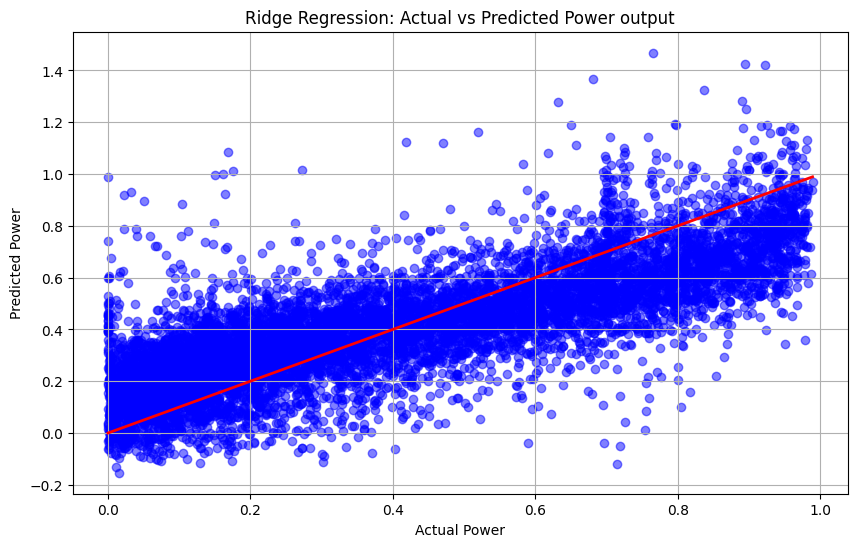

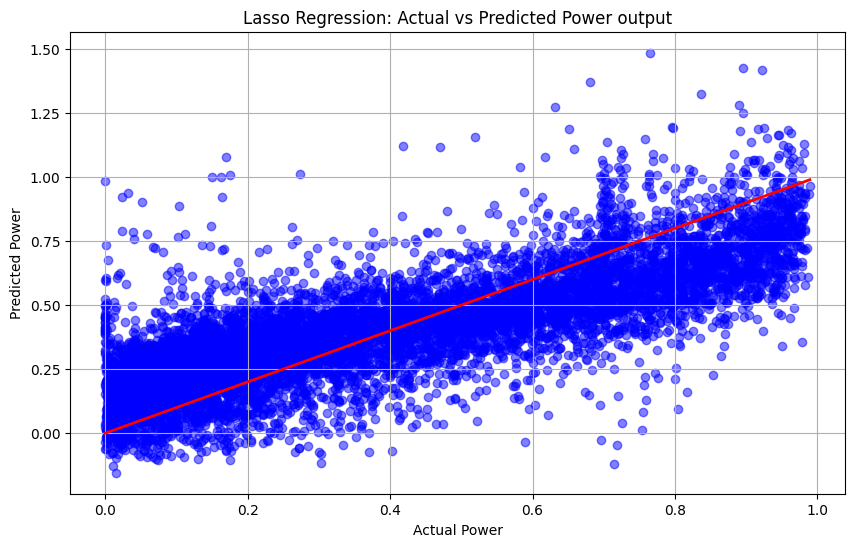

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# ---- Preprocessing: Standardize the features ----
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for Ridge and Lasso
ridge_param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
lasso_param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize Ridge and Lasso models
ridge_model = Ridge(random_state=42)
lasso_model = Lasso(random_state=42)

# GridSearchCV for Ridge
ridge_search = GridSearchCV(estimator=ridge_model, param_grid=ridge_param_grid,
                            cv=5, scoring='r2', n_jobs=-1, verbose=1)
ridge_search.fit(X_train_scaled, y_train)

# GridSearchCV for Lasso
lasso_search = GridSearchCV(estimator=lasso_model, param_grid=lasso_param_grid,
                            cv=5, scoring='r2', n_jobs=-1, verbose=1)
lasso_search.fit(X_train_scaled, y_train)

# --- Ridge Regression Results ---
best_ridge = ridge_search.best_estimator_
ridge_pred = best_ridge.predict(X_test_scaled)

ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_mae = mean_absolute_error(y_test, ridge_pred)  # Adding MAE calculation
ridge_r2 = r2_score(y_test, ridge_pred)

print("\nRidge Regression Results:")
print(f"Best Alpha for Ridge: {ridge_search.best_params_['alpha']}")
print(f"Mean Squared Error (MSE): {ridge_mse}")
print(f"Mean Absolute Error (MAE): {ridge_mae}")  # Displaying MAE
print(f"R-squared (R²): {ridge_r2}")

# --- Lasso Regression Results ---
best_lasso = lasso_search.best_estimator_
lasso_pred = best_lasso.predict(X_test_scaled)

lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print("\nLasso Regression Results:")
print(f"Best Alpha for Lasso: {lasso_search.best_params_['alpha']}")
print(f"Mean Squared Error (MSE): {lasso_mse}")
print(f"Mean Absolute Error (MAE): {lasso_mae}")
print(f"R-squared (R²): {lasso_r2}")

# --- Visualization for Ridge ---
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ridge_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title("Ridge Regression: Actual vs Predicted Power output")
plt.xlabel("Actual Power")
plt.ylabel("Predicted Power")
plt.grid(True)
plt.show()

# --- Visualization for Lasso ---
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lasso_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title("Lasso Regression: Actual vs Predicted Power output")
plt.xlabel("Actual Power")
plt.ylabel("Predicted Power")
plt.grid(True)
plt.show()


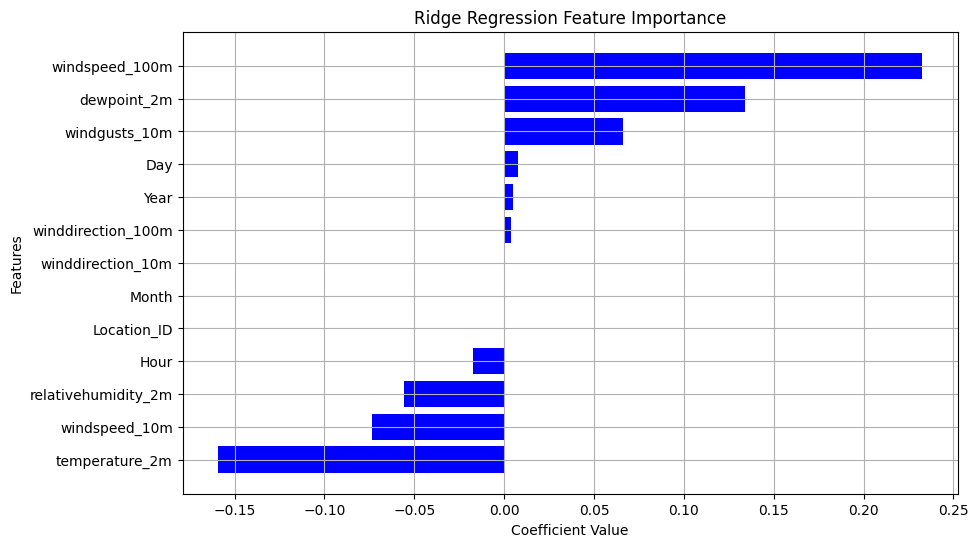

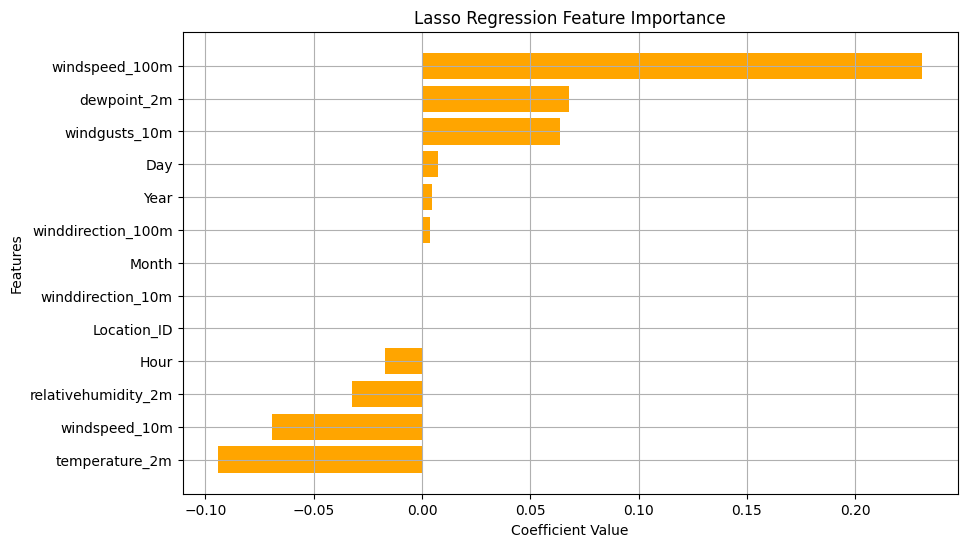

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ---- Ridge Regression Feature Importance ----
ridge_coefficients = pd.DataFrame({
    'Feature': X.columns,  # Replace with X_train.columns if using a DataFrame
    'Coefficient': best_ridge.coef_
}).sort_values(by='Coefficient', ascending=False)

# Plot Ridge Coefficients
plt.figure(figsize=(10, 6))
plt.barh(ridge_coefficients['Feature'], ridge_coefficients['Coefficient'], color='blue')
plt.title('Ridge Regression Feature Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

# ---- Lasso Regression Feature Importance ----
lasso_coefficients = pd.DataFrame({
    'Feature': X.columns,  # Replace with X_train.columns if using a DataFrame
    'Coefficient': best_lasso.coef_
}).sort_values(by='Coefficient', ascending=False)

# Plot Lasso Coefficients
plt.figure(figsize=(10, 6))
plt.barh(lasso_coefficients['Feature'], lasso_coefficients['Coefficient'], color='orange')
plt.title('Lasso Regression Feature Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


##tree-based models

Decision Tree Regressor:
Mean Squared Error: 0.037982224113013704
Mean Absolute Error: 0.13063829908675798
R-squared: 0.541014071731176

Random Forest Regressor:
Mean Squared Error: 0.01804812393845285
Mean Absolute Error: 0.09759647819634704
R-squared: 0.7819023210764715

Gradient Boosting Regressor:
Mean Squared Error: 0.02460291826937649
Mean Absolute Error: 0.11900154408555498
R-squared: 0.7026926794388877



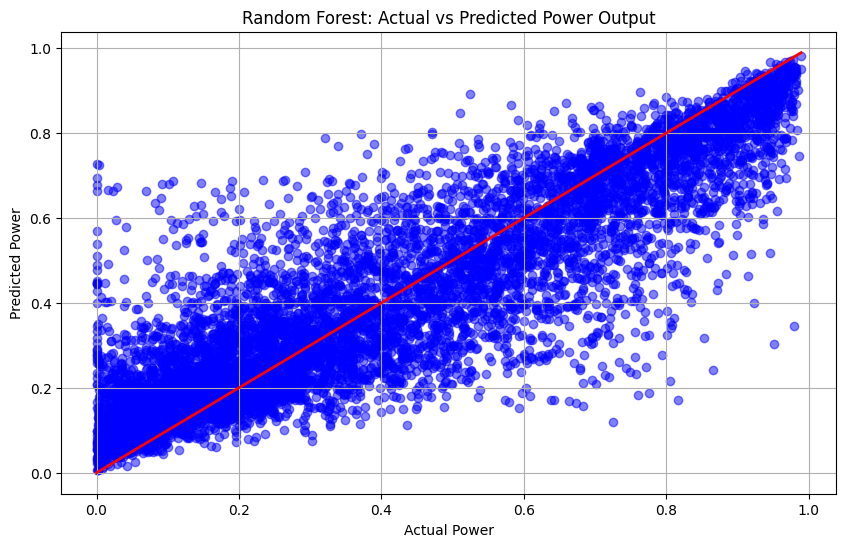

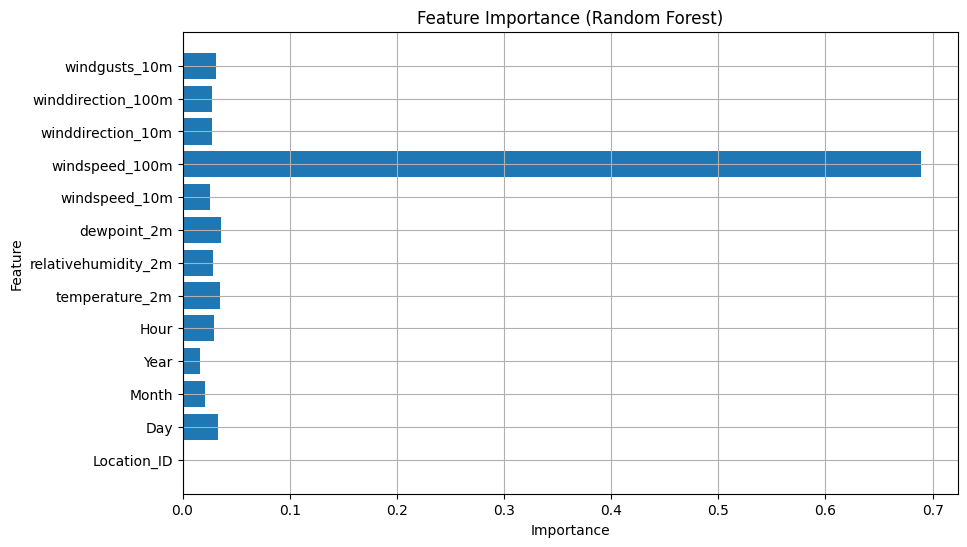

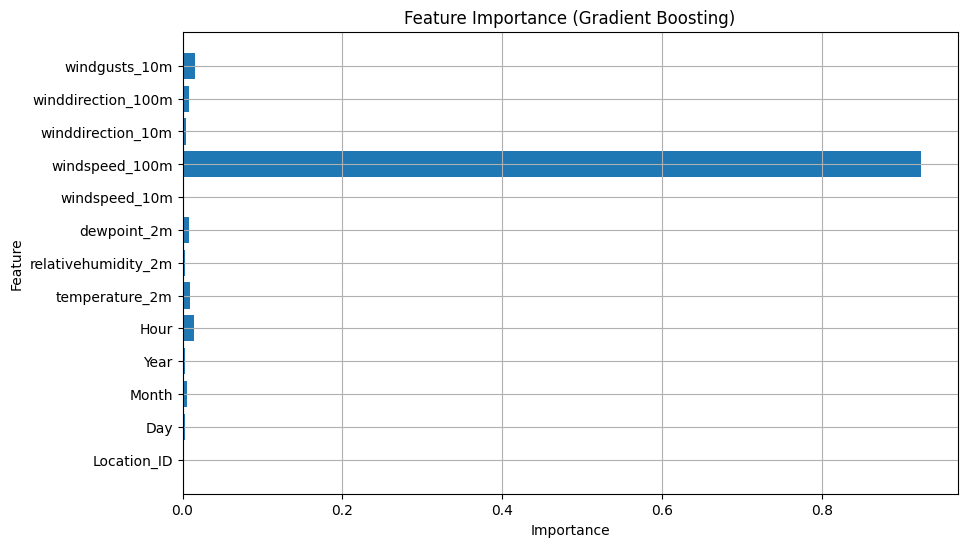

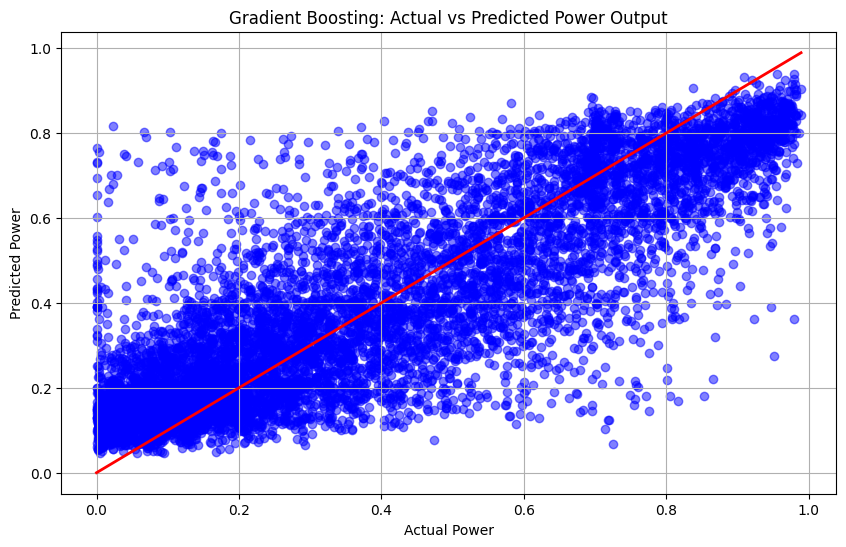

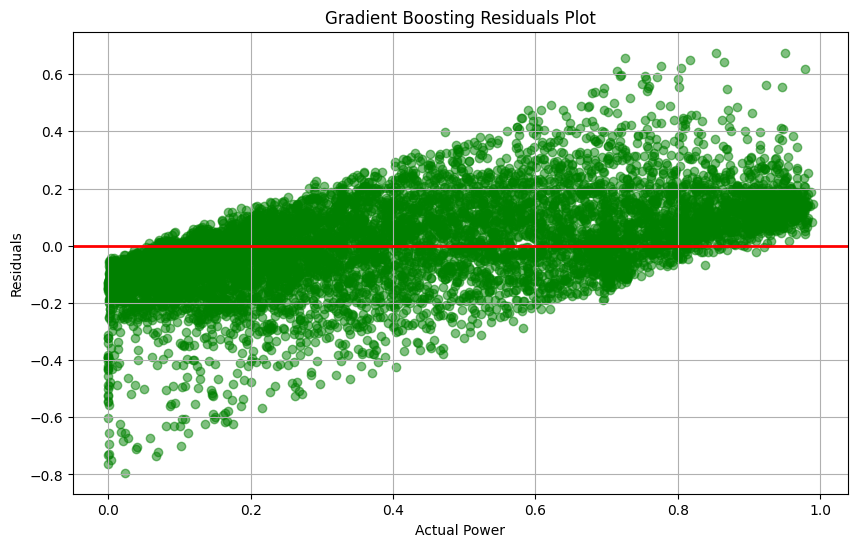

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# --- Decision Tree Regressor ---
# Initialize Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Calculate performance metrics
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)  # Adding MAE calculation
r2_dt = r2_score(y_test, y_pred_dt)

# --- Random Forest Regressor ---
# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate performance metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)  # Adding MAE calculation
r2_rf = r2_score(y_test, y_pred_rf)

# --- Gradient Boosting Regressor ---
# Initialize Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Calculate performance metrics
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Print the results
print("Decision Tree Regressor:")
print(f"Mean Squared Error: {mse_dt}")
print(f"Mean Absolute Error: {mae_dt}")
print(f"R-squared: {r2_dt}\n")

print("Random Forest Regressor:")
print(f"Mean Squared Error: {mse_rf}")
print(f"Mean Absolute Error: {mae_rf}")
print(f"R-squared: {r2_rf}\n")

print("Gradient Boosting Regressor:")
print(f"Mean Squared Error: {mse_gb}")
print(f"Mean Absolute Error: {mae_gb}")
print(f"R-squared: {r2_gb}\n")

# --- Visualize results: Actual vs Predicted (for Random Forest) ---
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title("Random Forest: Actual vs Predicted Power Output")
plt.xlabel("Actual Power")
plt.ylabel("Predicted Power")
plt.grid(True)
plt.show()

# --- Feature Importance from Random Forest ---
feature_importances = rf_model.feature_importances_

# Visualize Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid(True)
plt.show()

# --- Feature Importance from Gradient Boosting ---
feature_importances_gb = gb_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances_gb)
plt.title("Feature Importance (Gradient Boosting)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid(True)
plt.show()

# --- Visualizing Actual vs Predicted (Gradient Boosting) ---
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title("Gradient Boosting: Actual vs Predicted Power Output")
plt.xlabel("Actual Power")
plt.ylabel("Predicted Power")
plt.grid(True)
plt.show()

# --- Residuals Plot (Gradient Boosting) ---
residuals_gb = y_test - y_pred_gb

plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals_gb, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linewidth=2)
plt.title("Gradient Boosting Residuals Plot")
plt.xlabel("Actual Power")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()


###optimised tree based

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

# Define the features and target variable
features = df_loc1.drop(['Power', 'Date', 'Time'], axis=1)
target = df_loc1['Power']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Function to fit and evaluate a model using GridSearchCV
def fit_evaluate_model(model, param_grid, X_train, X_test, y_train, y_test):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best model and its parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Evaluate the best model
    pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    r2 = r2_score(y_test, pred)

    print(f"Best Parameters: {best_params}")
    print(f"MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

    return best_model

# Define models and their parameter grids
models_param_grids = [
    (DecisionTreeRegressor(random_state=42), {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 10, 20]
    }),
    (RandomForestRegressor(random_state=42), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    (GradientBoostingRegressor(random_state=42), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    })
]

# Loop over each model and parameter grid to fit and evaluate
best_models = []
for model, param_grid in models_param_grids:
    best_model = fit_evaluate_model(model, param_grid, X_train, X_test, y_train, y_test)
    best_models.append(best_model)


Best Parameters: {'max_depth': 5, 'min_samples_split': 2}
MSE: 0.0271, MAE: 0.1253, R2: 0.6729
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
MSE: 0.0179, MAE: 0.0973, R2: 0.7836


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

# Define the features and target variable
features = df_loc1.drop(['Power', 'Date', 'Time'], axis=1)
target = df_loc1['Power']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Function to fit and evaluate a model using RandomizedSearchCV
def fit_evaluate_model(model, param_dist, X_train, X_test, y_train, y_test):
    # Use RandomizedSearchCV instead of GridSearchCV to speed things up
    randomized_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                           n_iter=10, cv=3, scoring='neg_mean_squared_error',
                                           n_jobs=-1, random_state=42, verbose=1)
    randomized_search.fit(X_train, y_train)

    # Get the best model and its parameters
    best_model = randomized_search.best_estimator_
    best_params = randomized_search.best_params_

    # Evaluate the best model
    pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    r2 = r2_score(y_test, pred)

    print(f"Best Parameters: {best_params}")
    print(f"MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

    return best_model

# Define models and their parameter distributions (note the use of distributions instead of grids)
models_param_distributions = [
    (DecisionTreeRegressor(random_state=42), {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 10, 20]
    }),
    (RandomForestRegressor(random_state=42), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    (GradientBoostingRegressor(random_state=42), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    })
]

# Loop over each model and parameter distribution to fit and evaluate
best_models = []
for model, param_dist in models_param_distributions:
    best_model = fit_evaluate_model(model, param_dist, X_train, X_test, y_train, y_test)
    best_models.append(best_model)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'min_samples_split': 20, 'max_depth': 5}
MSE: 0.0271, MAE: 0.1253, R2: 0.6729
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
MSE: 0.0179, MAE: 0.0973, R2: 0.7836
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1}
MSE: 0.0132, MAE: 0.0834, R2: 0.8405


In [ ]:
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# --- Random Forest Regressor ---
# Initialize and train Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predict using Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Calculate performance metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor Results:")
print(f"Mean Squared Error: {mse_rf}")
print(f"Mean Absolute Error: {mae_rf}")
print(f"R-squared: {r2_rf}\n")

# SHAP Feature Importance for Random Forest
explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X_test)

# Plot summary plot for feature importance
shap.summary_plot(shap_values_rf, X_test)

# Plot dependence plot for a feature (e.g., temperature_2m)
shap.dependence_plot('temperature_2m', shap_values_rf, X_test)

# --- Gradient Boosting Regressor ---
# Initialize and train Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predict using Gradient Boosting model
y_pred_gb = gb_model.predict(X_test)

# Calculate performance metrics
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\nGradient Boosting Regressor Results:")
print(f"Mean Squared Error: {mse_gb}")
print(f"Mean Absolute Error: {mae_gb}")
print(f"R-squared: {r2_gb}\n")

# SHAP Feature Importance for Gradient Boosting
explainer_gb = shap.TreeExplainer(gb_model)
shap_values_gb = explainer_gb.shap_values(X_test)

# Plot summary plot for feature importance
shap.summary_plot(shap_values_gb, X_test)

# Plot dependence plot for a feature (e.g., temperature_2m)
shap.dependence_plot('temperature_2m', shap_values_gb, X_test)



Random Forest Regressor Results:
Mean Squared Error: 0.01804812393845285
Mean Absolute Error: 0.09759647819634704
R-squared: 0.7819023210764715



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to fit, evaluate, and visualize the model performance
def fit_evaluate_and_plot(model, param_dist, X_train, X_test, y_train, y_test, model_name):
    # Use RandomizedSearchCV instead of GridSearchCV to speed things up
    randomized_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                           n_iter=10, cv=3, scoring='neg_mean_squared_error',
                                           n_jobs=-1, random_state=42, verbose=1)
    randomized_search.fit(X_train, y_train)

    # Get the best model and its parameters
    best_model = randomized_search.best_estimator_
    best_params = randomized_search.best_params_

    # Evaluate the best model
    pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    r2 = r2_score(y_test, pred)

    print(f"{model_name} - Best Parameters: {best_params}")
    print(f"MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

    # Plotting actual vs predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, pred, color='blue', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.title(f"Actual vs Predicted for {model_name}")
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()

    return best_model

# Define models and their parameter distributions
models_param_distributions = [
    (DecisionTreeRegressor(random_state=42), {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 10, 20]
    }),
    (RandomForestRegressor(random_state=42), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    (GradientBoostingRegressor(random_state=42), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    })
]

# Loop over each model and parameter distribution to fit, evaluate, and plot
best_models = []
for model, param_dist in models_param_distributions:
    best_model = fit_evaluate_and_plot(model, param_dist, X_train, X_test, y_train, y_test, model.__class__.__name__)
    best_models.append(best_model)


##XGBOOST

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Define the features and target variable
features = df_loc1.drop(['Power', 'Date', 'Time'], axis=1)
target = df_loc1['Power']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print(f"XGBoost Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

# --- 1. Visualize Actual vs Predicted ---
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title("XGBoost: Actual vs Predicted Power Consumption")
plt.xlabel("Actual Power")
plt.ylabel("Predicted Power")
plt.grid(True)
plt.show()

# --- 2. Residuals Plot ---
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linewidth=2)
plt.title("XGBoost Residuals Plot")
plt.xlabel("Actual Power")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# --- 3. Feature Importance Plot ---
plt.figure(figsize=(10, 6))
plt.barh(features.columns, xgb_model.feature_importances_)
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid(True)
plt.show()


optimised

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Define the features and target variable
features = df_loc1.drop(['Power', 'Date', 'Time'], axis=1)
target = df_loc1['Power']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# --- Hyperparameter tuning using GridSearchCV ---
# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Output the best parameters from GridSearchCV
print(f"Best parameters from GridSearchCV: {grid_search.best_params_}")

# Get the best model from grid search
best_xgb_model = grid_search.best_estimator_

# --- Train the best model ---
best_xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print(f"XGBoost Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

# --- 1. Visualize Actual vs Predicted ---
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title("XGBoost: Actual vs Predicted Power output")
plt.xlabel("Actual Power")
plt.ylabel("Predicted Power")
plt.grid(True)
plt.show()



##knn

KNN Regression Model Evaluation:
Mean Squared Error (MSE): 0.0122010909026484
Mean Absolute Error (MAE): 0.0749133196347032
R-squared (R²): 0.8525592125100008


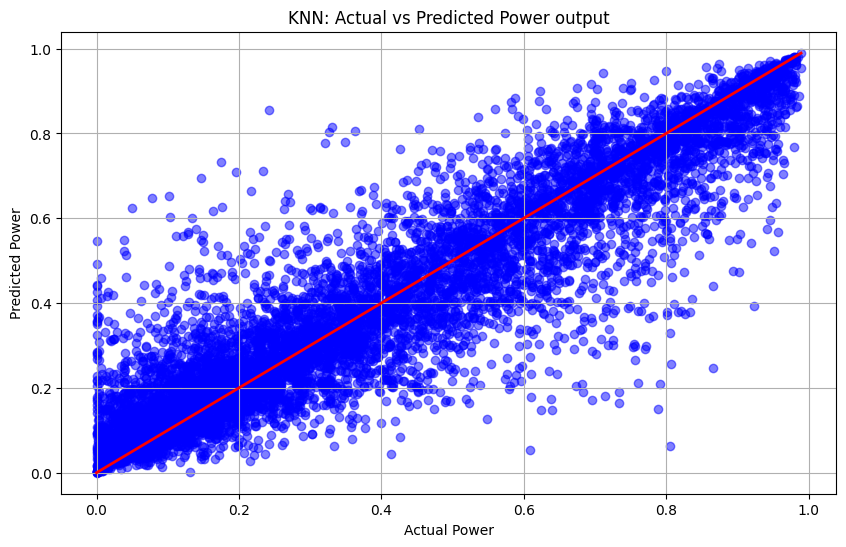

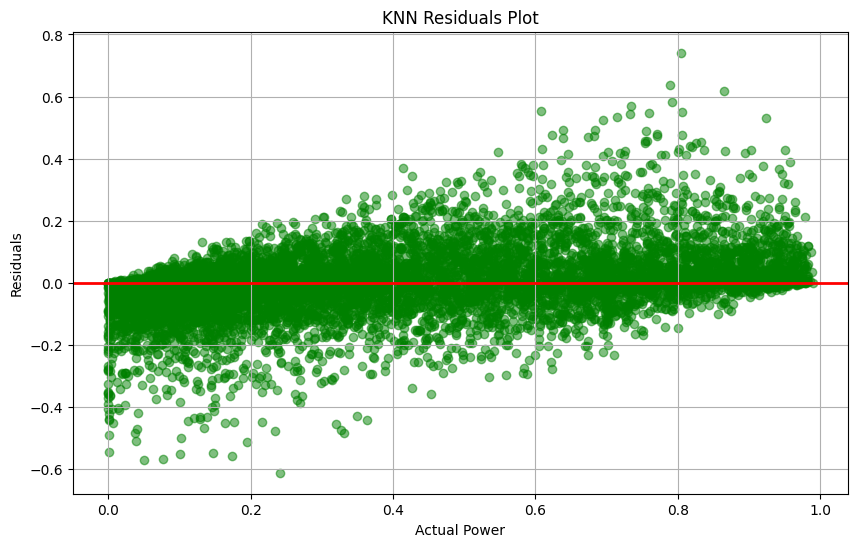

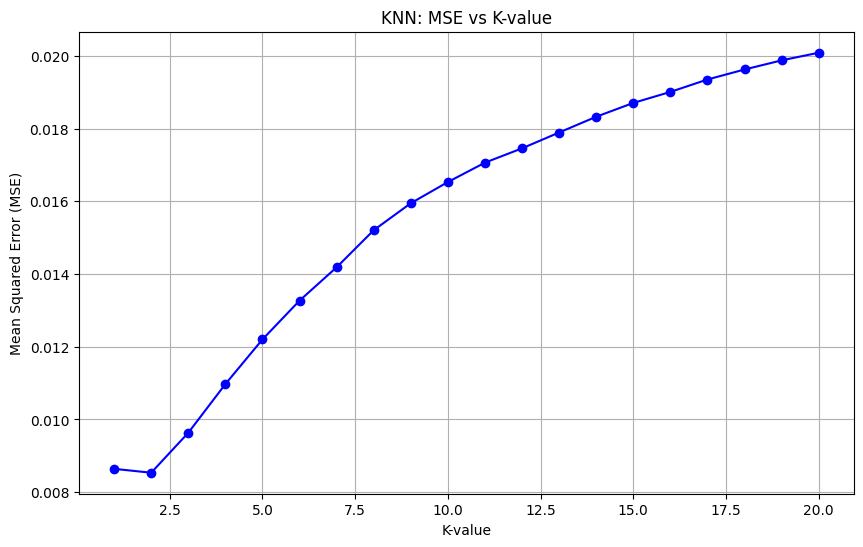

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Define the features and target variable
features = df_loc1[['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m',
                    'windspeed_10m', 'windspeed_100m', 'winddirection_10m',
                    'winddirection_100m', 'windgusts_10m', 'Day', 'Month',
                    'Year', 'Hour']]
target = df_loc1['Power']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# ---- Preprocessing: Standardize the features ----
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5, weights='uniform', metric='minkowski', p=2)

# Train the model
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print(f"KNN Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

# --- 1. Visualize Actual vs Predicted ---
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title("KNN: Actual vs Predicted Power output")
plt.xlabel("Actual Power")
plt.ylabel("Predicted Power")
plt.grid(True)
plt.show()

# --- 2. Residuals Plot ---
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linewidth=2)
plt.title("KNN Residuals Plot")
plt.xlabel("Actual Power")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()


k_range = range(1, 21)
mse_values = []

for k in k_range:
    knn_model = KNeighborsRegressor(n_neighbors=k, weights='uniform', metric='minkowski', p=2)
    knn_model.fit(X_train_scaled, y_train)
    y_pred_k = knn_model.predict(X_test_scaled)
    mse_values.append(mean_squared_error(y_test, y_pred_k))

plt.figure(figsize=(10, 6))
plt.plot(k_range, mse_values, marker='o', color='blue')
plt.title("KNN: MSE vs K-value")
plt.xlabel("K-value")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.show()


Optimal K: 2

Optimized KNN Regression Model Evaluation:
Optimal K: 2
Mean Squared Error (MSE): 0.0085
Mean Absolute Error (MAE): 0.0486
R-squared (R²): 0.8969


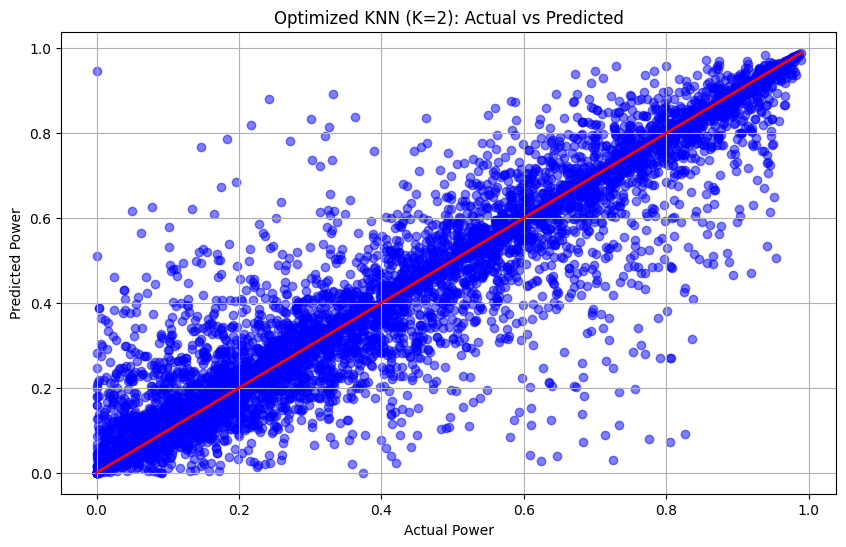

In [ ]:


k_range = range(1, 21)
mse_values = []

for k in k_range:
    knn_model = KNeighborsRegressor(n_neighbors=k, weights='uniform', metric='minkowski', p=2)
    knn_model.fit(X_train_scaled, y_train)
    y_pred_k = knn_model.predict(X_test_scaled)
    mse_values.append(mean_squared_error(y_test, y_pred_k))



#Identify the optimal k (the one with the lowest MSE)
optimal_k = k_range[np.argmin(mse_values)]
print(f"Optimal K: {optimal_k}")

# Retrain the KNN model with the optimal k
optimized_knn = KNeighborsRegressor(n_neighbors=optimal_k, weights='uniform', metric='minkowski', p=2)
optimized_knn.fit(X_train_scaled, y_train)

# Make predictions with the optimized KNN
y_pred_optimized = optimized_knn.predict(X_test_scaled)

# Evaluate the optimized KNN model
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

# Print the evaluation results
print("\nOptimized KNN Regression Model Evaluation:")
print(f"Optimal K: {optimal_k}")
print(f"Mean Squared Error (MSE): {mse_optimized:.4f}")
print(f"Mean Absolute Error (MAE): {mae_optimized:.4f}")
print(f"R-squared (R²): {r2_optimized:.4f}")

# Visualize the actual vs predicted for the optimized model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_optimized, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title(f"Optimized KNN (K={optimal_k}): Actual vs Predicted")
plt.xlabel("Actual Power")
plt.ylabel("Predicted Power")
plt.grid(True)
plt.show()







##polynomial regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Define the features and target variable
features = df_loc1[['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m',
                    'windspeed_10m', 'windspeed_100m', 'winddirection_10m',
                    'winddirection_100m', 'windgusts_10m', 'Day', 'Month',
                    'Year', 'Hour']]
target = df_loc1['Power']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# ---- Polynomial Feature Transformation ----
# Create polynomial features of degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize Linear Regression Model
poly_model = LinearRegression()

# Train the model
poly_model.fit(X_train_poly, y_train)

# Make predictions on the test data
y_pred = poly_model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print(f"Polynomial Linear Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

# --- 1. Visualize Actual vs Predicted ---
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title("Polynomial Linear Regression: Actual vs Predicted Power Consumption")
plt.xlabel("Actual Power")
plt.ylabel("Predicted Power")
plt.grid(True)
plt.show()

# --- 2. Residuals Plot ---
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linewidth=2)
plt.title("Polynomial Linear Regression Residuals Plot")
plt.xlabel("Actual Power")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# --- 3. Polynomial Feature Transformation Overview (Visualizing Degree 2 Features) ---
# Visualizing the transformation on a subset of features (choose two features for visualization)
poly_features = poly.fit_transform(X_train[['temperature_2m', 'relativehumidity_2m']])  # Take two features for simplicity

# Plot the first two polynomial features
plt.figure(figsize=(10, 6))
plt.scatter(poly_features[:, 0], poly_features[:, 1], alpha=0.5, color='blue')
plt.title("Polynomial Features (Degree 2) Transformation Overview")
plt.xlabel("Polynomial Feature 1: temperature_2m")
plt.ylabel("Polynomial Feature 2: relativehumidity_2m")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt

# Define the features and target variable
features = df_loc1[['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m',
                    'windspeed_10m', 'windspeed_100m', 'winddirection_10m',
                    'winddirection_100m', 'windgusts_10m', 'Day', 'Month',
                    'Year', 'Hour']]
target = df_loc1['Power']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Hyperparameter tuning for PolynomialFeatures degree and regularization strength
param_grid = {
    'poly__degree': [1, 2, 3],  # Polynomial degrees
    'model__alpha': [0.01, 0.1, 1, 10, 100]  # Regularization strength for Ridge and Lasso
}

# Create a pipeline with PolynomialFeatures + Ridge Regression
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('model', Ridge())
])

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best parameters found:", grid_search.best_params_)

# Get the best model and make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print(f"Optimized Polynomial Linear Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

# --- 1. Visualize Actual vs Predicted ---
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title("Optimised Polynomial Linear Regression: Actual vs Predicted Power output")
plt.xlabel("Actual Power")
plt.ylabel("Predicted Power")
plt.grid(True)
plt.show()

# --- 2. Residuals Plot ---
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linewidth=2)
plt.title("Optimized Polynomial Linear Regression Residuals Plot")
plt.xlabel("Actual Power")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()



from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso

# Update the pipeline to use Lasso Regression
pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('model', Lasso(max_iter=10000, random_state=42))
])

# Define hyperparameters for Polynomial degree and Lasso regularization strength (alpha)
param_grid = {
    'poly__degree': [1, 2, 3],  # Polynomial degrees
    'model__alpha': [0.001, 0.01, 0.1, 1, 10]  # Regularization strengths
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best parameters found:", grid_search.best_params_)

# Get the best model and make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"\nOptimized Polynomial Lasso Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# --- 1. Visualize Actual vs Predicted ---
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title("Optimized Polynomial Lasso Regression: Actual vs Predicted Power Output")
plt.xlabel("Actual Power")
plt.ylabel("Predicted Power")
plt.grid(True)
plt.show()

# --- 2. Residuals Plot ---
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linewidth=2)
plt.title("Optimized Polynomial Lasso Regression Residuals Plot")
plt.xlabel("Actual Power")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()
